## Instructor Demo: Simulation of Stock Price Trajectory

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading) for `AAPL` stock, based on a normal probability distribution of historical average daily returns derived from the sample mean and standard deviation.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("newkeys.env")

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 5 Years Worth of Data via API Call and Read in as DataFrame 

We use the get_barset() function from the Alpaca SDK to retrieve a DataFrame of AAPL daily stock prices. The start_date and end_date variables, in this case, are set to five years from the current date and the current date, respectively. To fetch the stock data correctly, the Alpaca SDK works with dates in ISO format, so we transform the start_date and the end_date using the Timestamp and isoformat functions from Pandas.

In [4]:
# Set the ticker
ticker = "AAPL"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2015-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

AAPL                               
                            open   high    low  close    volume
2016-05-13 00:00:00-04:00  90.01  91.67  90.00  90.52  38788350
2016-05-16 00:00:00-04:00  92.45  94.39  91.65  93.87  51078865
2016-05-17 00:00:00-04:00  94.55  94.70  93.01  93.48  39312545
2016-05-18 00:00:00-04:00  94.16  95.21  93.89  94.57  36439836
2016-05-19 00:00:00-04:00  94.63  94.64  93.57  94.20  24660588

### Run the Monte Carlo Simulation

Next, we configure and run 500 Monte Carlo simulations to forecast the stock daily returns over the next 252 trading days.

In [5]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AAPL = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [6]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.957860,0.982630,1.007992,1.007408,1.022763,0.996711,1.022481,0.985574,0.989271,0.999108,...,1.020449,1.026637,0.999534,0.995158,0.997746,1.013202,1.014031,1.004435,0.998086,1.031631
2,0.961441,0.965823,1.015333,1.029058,1.054707,0.970008,1.005108,0.999996,1.008329,1.020403,...,1.024654,1.071339,0.998119,0.984443,1.027127,0.989795,1.045501,0.958683,1.017585,1.036189
3,0.962670,0.982128,1.011007,1.036978,1.031518,0.951337,0.959734,1.001567,0.993364,0.991210,...,1.029809,1.042588,0.998347,0.975066,1.022250,0.970325,1.043485,0.951900,1.042816,1.020507
4,0.944441,1.000156,1.006894,1.052895,1.050399,0.950410,0.983021,1.011686,1.010033,1.003340,...,1.055298,1.048099,0.996096,0.982945,1.019224,0.998996,1.048522,0.956351,1.025125,1.006662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.264662,1.486494,0.932305,1.516543,1.895015,0.801283,1.824298,1.809922,0.905455,2.005949,...,0.872084,1.824459,0.836804,0.839736,1.778363,0.877286,1.089931,0.883945,1.232498,1.003324
249,1.328811,1.498157,0.939786,1.540884,1.878821,0.767593,1.835510,1.804873,0.900265,2.038454,...,0.872480,1.815165,0.834038,0.843162,1.776413,0.867533,1.113524,0.891692,1.243976,0.995613
250,1.330788,1.440336,0.953276,1.523203,1.858208,0.759474,1.881315,1.761043,0.922382,2.022415,...,0.864384,1.858076,0.870089,0.828209,1.804978,0.861397,1.119185,0.905911,1.281936,1.006035
251,1.375036,1.502719,0.957497,1.534209,1.833846,0.766161,1.898477,1.758569,0.924654,1.996348,...,0.869768,1.884392,0.870728,0.862269,1.825419,0.861394,1.152177,0.885594,1.272013,1.002329


### Plot the Simulated Outcomes for the Next Year (252 Traiding Days)

Plotting the DataFrame of simulated AAPL daily returns for the next 252 trading days shows all the potential pathways for how AAPL stock prices may behave in the next year. We use the plot_simulation() function to visually analyze the 500 possible scenarios that we may have over the next 252 trading days.

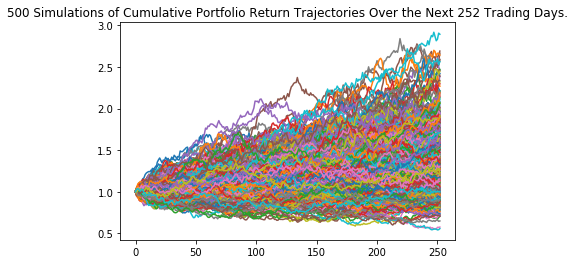

In [7]:
# Plot simulation outcomes
line_plot = MC_AAPL.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `AAPL` over the Next Year (252 Trading Days)

Plotting the best and worst-case scenario for cumulative returns makes a lot of intuitive sense from an investment standpoint. We create a DataFrame with the mean, median, minimum, and maximum daily return value to generate a plot to summarize the behavior of the AAPL stock in the simulated future. Note that we used the argument axis=1 to compute the statistics by column.

In [9]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_AAPL.simulated_return.mean(axis=1)),
    "median": list(MC_AAPL.simulated_return.median(axis=1)),
    "min": list(MC_AAPL.simulated_return.min(axis=1)),
    "max": list(MC_AAPL.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000537,0.999911,0.942638,1.054835
2,1.001635,1.002487,0.928640,1.096577
3,1.002122,1.000748,0.898673,1.109850
4,1.003516,1.003470,0.885033,1.124328


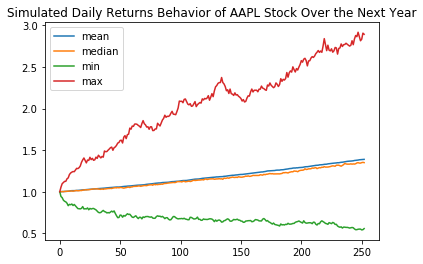

In [10]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AAPL Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

It is also interesting to visually analyze what would be the possible outcomes of an initial investment. Let's calculate the simulated profits and losses of an initial investment of $10,000 in AAPL stocks.

In [11]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10005.373634,9999.105148,9426.382976,10548.353793
2,10016.348835,10024.869056,9286.404575,10965.766095
3,10021.218290,10007.481159,8986.729326,11098.502711
4,10035.159266,10034.702623,8850.331762,11243.283495


### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

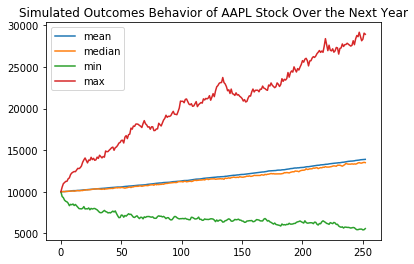

In [12]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

Finally, we calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks with a 95% confidence interval by fetching the summary statistics from the Monte Carlo simulation results.



In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.389361
std               0.415385
min               0.556285
25%               1.088005
50%               1.350174
75%               1.636027
max               2.894655
95% CI Lower      0.763245
95% CI Upper      2.388504
Name: 252, dtype: float64


In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7632.45 and $23885.04.
